# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
#use Normalization during RNN. 
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [4]:
#60 is a random number settled after some experiments. ie 3 previous months stock price is anlayzed to perdict the next day number
X_train = []
y_train = []
#1258 rows
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train =np.array(X_train), np.array(y_train)
print(X_train)
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [5]:
#addone more diemsionlaity to the X_train to help in predicting 
X_train = np.reshape(X_train,((X_train.shape[0], X_train.shape[1],1)))
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#Dense for output, Dropuout for dropping out and avoid overfitting

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units= 50, return_sequences=True)) # there will not be a input shape as it inside
regressor.add(Dropout(rate=0.2)) # drop 20% in each layer

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units= 50)) # there will not be a input shape as it inside
regressor.add(Dropout(0.2)) # drop 20% in each layer

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
#regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [15]:
regressor.compile(optimizer='adam', loss='mse') 

### Fitting the RNN to the Training set

In [16]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0441
Epoch 2/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0054
Epoch 3/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0047
Epoch 4/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0043
Epoch 5/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0039
Epoch 7/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0036 1s -
Epoch 12/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0033
Epoch 13

38/38 [==============================] - 6s 167ms/step - loss: 0.0013
Epoch 100/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0012


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [18]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


### Getting the predicted stock price of 2017

In [20]:
#we need to concat both train and test set as we need the previous 60 days price to predict the price in 2017.
#concat the original datasets instead of the scaled data sets

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

print(predicted_stock_price)
print(real_stock_price)

[[788.7354 ]
 [785.789  ]
 [786.5327 ]
 [788.0084 ]
 [791.86383]
 [798.58966]
 [804.33136]
 [806.39526]
 [806.6659 ]
 [806.22656]
 [805.6611 ]
 [805.06287]
 [804.6927 ]
 [805.32574]
 [806.45306]
 [812.07697]
 [819.83014]
 [827.9702 ]
 [832.01074]
 [826.5617 ]]
[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


### Visualising the results

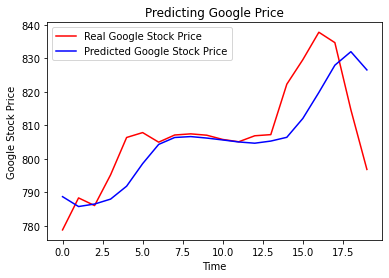

In [21]:
plt.title("Predicting Google Price")
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.legend()
plt.show()

In [22]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

11.351242814939388
